**<center>Feature engineering is all you need**

In this tutorial, I will talk about various ways to prepare data. I believe that this is one of the important parts of the whole field of machine learning. And not the easiest! First of all, I want to note that there is no absolutely uniform and correct data preparation. Feature engineering is an art ! I just show the different ways to convert data. And you just have to try different methods for your own task.
Let's start!

**1. Standardization**

The result of standardization (or Z-score normalization) is that the features will be rescaled so 
that they’ll have the properties of a standard normal distribution with mean m = 0, and standart deviation d = 0.
Standard scores (also called z scores) of the samples are calculated as follows:
**z=(x−m)/d**
Standardizing the features so that they are centered around 0 with a standard deviation of 1 is not only important 
if we are comparing measurements that have different units, but it is also a general requirement for many machine learning 
algorithms. Intuitively, we can think of gradient descent as a prominent example (an optimization algorithm often used in
logistic regression, SVMs, perceptrons, neural networks etc.); with features being on different scales, certain weights 
may update faster than others since the feature values xj play a role in the weight updates.
Other intuitive examples include K-Nearest Neighbor algorithms and clustering algorithms that use, for example, Euclidean distance measures – in fact, tree-based classifier are probably the only classifiers where feature scaling doesn’t make a difference.

In fact, the only family of algorithms that I could think of being scale-invariant are tree-based methods. Let’s take the general CART decision tree algorithm. Without going into much depth regarding information gain and impurity measures, we can think of the decision as “is feature x_i >= some_val?” Intuitively, we can see that it really doesn’t matter on which scale this feature is (centimeters, Fahrenheit, a standardized scale – it really doesn’t matter).

Some examples of algorithms where feature scaling matters are:

-k-nearest neighbors with an Euclidean distance measure if want all features to contribute equally

-k-means (see k-nearest neighbors)

-logistic regression, SVMs, perceptrons, neural networks etc. if you are using gradient descent/ascent-based optimization, otherwise some weights will update much faster than others

-linear discriminant analysis, principal component analysis, kernel principal component analysis since you want to find directions of maximizing the variance (under the constraints that those directions/eigenvectors/principal components are orthogonal); you want to have features on the same scale since you’d emphasize variables on “larger measurement scales” more. There are many more cases than I can possibly list here … I always recommend you to think about the algorithm and what it’s doing, and then it typically becomes obvious whether we want to scale your features or not.

In addition, we’d also want to think about whether we want to “standardize” or “normalize” (here: scaling to [0, 1] range) our data. Some algorithms assume that our data is centered at 0. For example, if we initialize the weights of a small multi-layer perceptron with tanh activation units to 0 or small random values centered around zero, we want to update the model weights “equally.” As a rule of thumb I’d say: When in doubt, just standardize the data, it shouldn’t hurt.

**2. Min-Max scaling**

An alternative approach to Z-score normalization (or standardization) is the so-called Min-Max scaling (often also simply called “normalization” - a common cause for ambiguities).
In this approach, the data is scaled to a fixed range - usually 0 to 1.
The cost of having this bounded range - in contrast to standardization - is that we will end up with smaller standard deviations, which can suppress the effect of outliers.

A Min-Max scaling is typically done via the following equation:

**Xnorm=(X−Xmin)/(Xmax−Xmin)**


“Standardization or Min-Max scaling?” - There is no obvious answer to this question: it really depends on the application.

For example, in clustering analyses, standardization may be especially crucial in order to compare similarities between features based on certain distance measures. Another prominent example is the Principal Component Analysis, where we usually prefer standardization over Min-Max scaling, since we are interested in the components that maximize the variance.

However, this doesn’t mean that Min-Max scaling is not useful at all! A popular application is image processing, where pixel intensities have to be normalized to fit within a certain range (i.e., 0 to 255 for the RGB color range). Also, typical neural network algorithm require data that on a 0-1 scale.

Let's look, how we can do standardization or Min-Max scaling. 
Of course, we could make use of NumPy’s vectorization capabilities to calculate the z-scores for standardization and to normalize the data using the equations that were mentioned in the previous sections. However, there is an even more convenient approach using the preprocessing module from one of Python’s open-source machine learning library scikit-learn.

For the following examples and discussion, we will have a look at the free “Wine” Dataset that is deposited on the UCI machine learning repository
(http://archive.ics.uci.edu/ml/datasets/Wine).
The Wine dataset consists of 3 different classes where each row correspond to a particular wine sample.

The class labels (1, 2, 3) are listed in the first column, and the columns 2-14 correspond to 13 different attributes (features)

In [24]:
import pandas as pd
import numpy as np

df = pd.io.parsers.read_csv(
    'https://raw.githubusercontent.com/rasbt/pattern_classification/master/data/wine_data.csv',
     header=None,
     usecols=[0,1,2]
    )

df.columns=['Class label', 'Alcohol', 'Malic acid']

df.head()

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


As we can see in the table above, the features Alcohol (percent/volumne) and Malic acid (g/l) are measured on different scales,
so that Feature Scaling is necessary important prior to any comparison or combination of these data.

In [25]:
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(df[['Alcohol', 'Malic acid']])
df_std = std_scale.transform(df[['Alcohol', 'Malic acid']])

minmax_scale = preprocessing.MinMaxScaler().fit(df[['Alcohol', 'Malic acid']])
df_minmax = minmax_scale.transform(df[['Alcohol', 'Malic acid']])
print('Mean after standardization:\nAlcohol={:.2f}, Malic acid={:.2f}'
      .format(df_std[:,0].mean(), df_std[:,1].mean()))
print('\nStandard deviation after standardization:\nAlcohol={:.2f}, Malic acid={:.2f}'
      .format(df_std[:,0].std(), df_std[:,1].std()))

Mean after standardization:
Alcohol=-0.00, Malic acid=-0.00

Standard deviation after standardization:
Alcohol=1.00, Malic acid=1.00


In [26]:
print('Min-value after min-max scaling:\nAlcohol={:.2f}, Malic acid={:.2f}'
      .format(df_minmax[:,0].min(), df_minmax[:,1].min()))
print('\nMax-value after min-max scaling:\nAlcohol={:.2f}, Malic acid={:.2f}'
      .format(df_minmax[:,0].max(), df_minmax[:,1].max()))

Min-value after min-max scaling:
Alcohol=0.00, Malic acid=0.00

Max-value after min-max scaling:
Alcohol=1.00, Malic acid=1.00


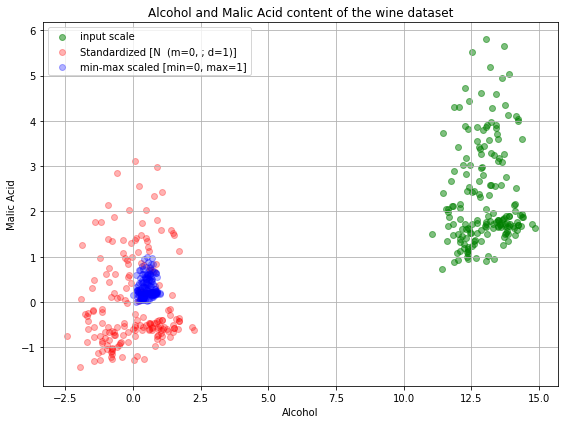

In [27]:
%matplotlib inline
from matplotlib import pyplot as plt

def plot():
    plt.figure(figsize=(8,6))

    plt.scatter(df['Alcohol'], df['Malic acid'],
            color='green', label='input scale', alpha=0.5)

    plt.scatter(df_std[:,0], df_std[:,1], color='red',
            label='Standardized [N  (m=0, ; d=1)]', alpha=0.3)

    plt.scatter(df_minmax[:,0], df_minmax[:,1],
            color='blue', label='min-max scaled [min=0, max=1]', alpha=0.3)

    plt.title('Alcohol and Malic Acid content of the wine dataset')
    plt.xlabel('Alcohol')
    plt.ylabel('Malic Acid')
    plt.legend(loc='upper left')
    plt.grid()

    plt.tight_layout()

plot()
plt.show()

Of course, we can also code the equations for standardization and 0-1 Min-Max scaling “manually”. However, the scikit-learn methods are still useful if you are working with test and training data sets and want to scale them equally.

E.g.,


In [28]:
# std_scale = preprocessing.StandardScaler().fit(X_train)
# X_train = std_scale.transform(X_train)
# X_test = std_scale.transform(X_test)

**3. Non-linear transformation. Mapping to a Uniform distribution**

Like scalers, QuantileTransformer puts all features into the same, known range or distribution. However, by performing a rank transformation, it smooths out unusual distributions and is less influenced by outliers than scaling methods. It does, however, distort correlations and distances within and across features.

QuantileTransformer and quantile_transform provide a non-parametric transformation based on the quantile function to map the data to a uniform distribution with values between 0 and 1:

In [29]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
quantile_transformer = preprocessing.QuantileTransformer(random_state=0)
X_train_trans = quantile_transformer.fit_transform(X_train)
X_test_trans = quantile_transformer.transform(X_test)
np.percentile(X_train[:, 0], [0, 25, 50, 75, 100]) 

array([4.3, 5.1, 5.8, 6.5, 7.9])

This feature corresponds to the sepal length in cm.
Once the quantile transformation applied, those landmarks approach closely the percentiles previously defined:

In [30]:
np.percentile(X_train_trans[:, 0], [0, 25, 50, 75, 100])

array([9.99999998e-08, 2.38738739e-01, 5.09009009e-01, 7.43243243e-01,
       9.99999900e-01])

This can be confirmed on a independent testing set with similar remarks:

In [31]:
np.percentile(X_test[:, 0], [0, 25, 50, 75, 100])

array([4.4  , 5.125, 5.75 , 6.175, 7.3  ])

In [32]:
np.percentile(X_test_trans[:, 0], [0, 25, 50, 75, 100])

array([0.01351351, 0.25012513, 0.47972973, 0.6021021 , 0.94144144])

**4. Non-linear transformation. Mapping to a Gaussian distribution**

In many modeling scenarios, normality of the features in a dataset is desirable. Power transforms are a family of parametric, monotonic transformations that aim to map data from any distribution to as close to a Gaussian distribution as possible in order to stabilize variance and minimize skewness.

PowerTransformer currently provides two such power transformations, the Yeo-Johnson transform and the Box-Cox transform.

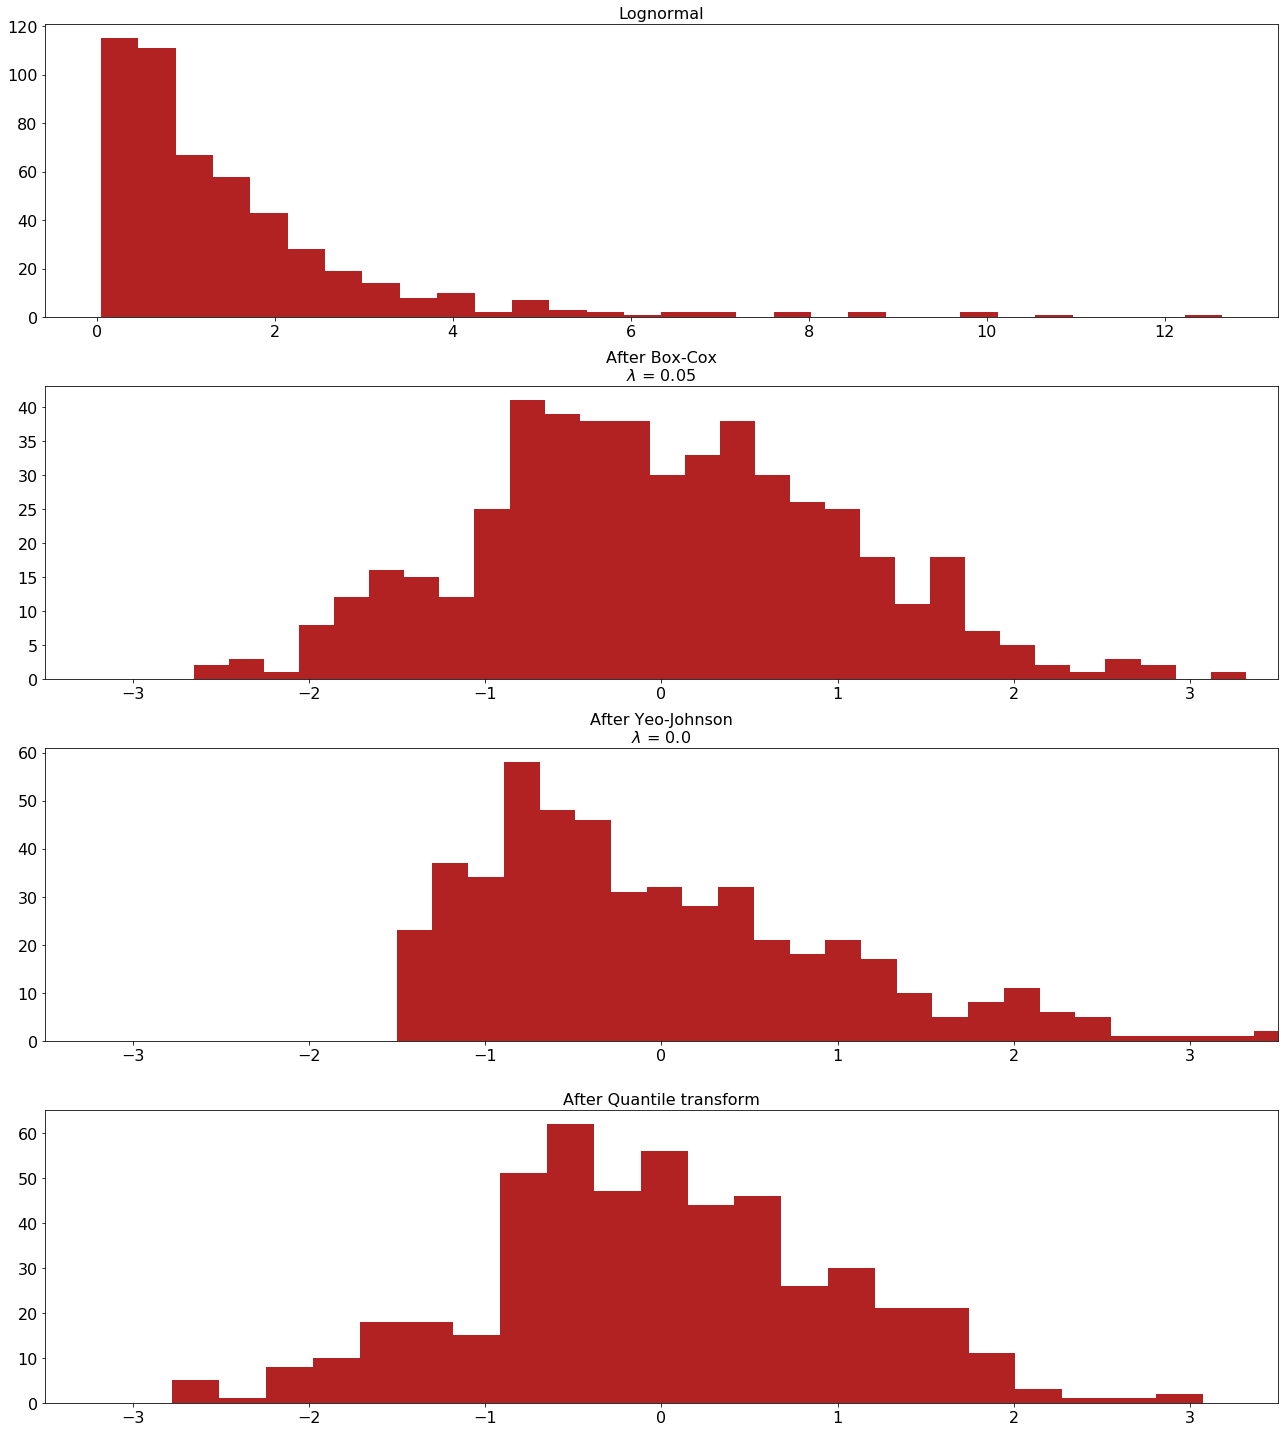

In [33]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.model_selection import train_test_split




N_SAMPLES = 1000
FONT_SIZE = 16
BINS = 30


rng = np.random.RandomState(304)
bc = PowerTransformer(method='box-cox')
yj = PowerTransformer(method='yeo-johnson')
qt = QuantileTransformer(output_distribution='normal', random_state=rng)
size = (N_SAMPLES, 1)


# lognormal distribution
X_lognormal = rng.lognormal(size=size)

# create plots
distributions = [
    ('Lognormal', X_lognormal)]

colors = ['firebrick']

fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(18,20))
axes = axes.flatten()
axes_idxs = [(0, 1, 2, 3)]
            
axes_list = [(axes[i], axes[j], axes[k], axes[l])
             for (i, j, k, l) in axes_idxs]


for distribution, color, axes in zip(distributions, colors, axes_list):
    name, X = distribution
    X_train, X_test = train_test_split(X, test_size=.5)

    # perform power transforms and quantile transform
    X_trans_bc = bc.fit(X_train).transform(X_test)
    lmbda_bc = round(bc.lambdas_[0], 2)
    X_trans_yj = yj.fit(X_train).transform(X_test)
    lmbda_yj = round(yj.lambdas_[0], 2)
    X_trans_qt = qt.fit(X_train).transform(X_test)

    ax_original, ax_bc, ax_yj, ax_qt = axes

    ax_original.hist(X_train, color=color, bins=BINS)
    ax_original.set_title(name, fontsize=FONT_SIZE)
    ax_original.tick_params(axis='both', which='major', labelsize=FONT_SIZE)

    for ax, X_trans, meth_name, lmbda in zip(
            (ax_bc, ax_yj, ax_qt),
            (X_trans_bc, X_trans_yj, X_trans_qt),
            ('Box-Cox', 'Yeo-Johnson', 'Quantile transform'),
            (lmbda_bc, lmbda_yj, None)):
        ax.hist(X_trans, color=color, bins=BINS)
        title = 'After {}'.format(meth_name)
        if lmbda is not None:
            title += '\n$\lambda$ = {}'.format(lmbda)
        ax.set_title(title, fontsize=FONT_SIZE)
        ax.tick_params(axis='both', which='major', labelsize=FONT_SIZE)
        ax.set_xlim([-3.5, 3.5])


plt.tight_layout()
plt.show()

Also note that even though Box-Cox seems to perform better than Yeo-Johnson for lognormal and chi-squared distributions, keep in mind that Box-Cox does not support inputs with negative values.
You can also try experimenting and apply the transform to other distributions.

  **5. Encoding categorical features**

In many practical Data Science activities, the data set will contain categorical variables. Categorical variables are variables that contain label values rather than numeric values. For example a person could have features *["male", "female"], ["from Europe", "from US", "from Asia"]*

Some algorithms can work with categorical data directly.

For example, a decision tree can be learned directly from categorical data with no data transform required (this depends on the specific implementation).
Many machine learning algorithms cannot operate on label data directly. They require all input variables and output variables to be numeric.
In general, this is mostly a constraint of the efficient implementation of machine learning algorithms rather than hard limitations on the algorithms themselves.
This means that categorical data must be converted to a numerical form. If the categorical variable is an output variable, you may also want to convert predictions by the model back into a categorical form in order to present them or use them in some application.
We can convert categorical features in two way:
-label encoding
-One-Hot Encoding


In [34]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(["paris", "paris", "tokyo", "amsterdam"])

list(le.classes_)
['amsterdam', 'paris', 'tokyo']
le.transform(["tokyo", "tokyo", "paris"]) 



array([2, 2, 1], dtype=int64)

In [35]:
list(le.inverse_transform([2, 2, 1]))
['tokyo', 'tokyo', 'paris']

['tokyo', 'tokyo', 'paris']

In [36]:
enc = preprocessing.OneHotEncoder()
X = [['male', 'from US', 'uses Safari'], ['female', 'from Europe', 'uses Firefox']]
enc.fit(X)  

OneHotEncoder(categorical_features=None, categories=None,
       dtype=<class 'numpy.float64'>, handle_unknown='error',
       n_values=None, sparse=True)

In [37]:
enc.transform([['female', 'from US', 'uses Safari'],['male', 'from Europe', 'uses Safari']]).toarray()

array([[1., 0., 0., 1., 0., 1.],
       [0., 1., 1., 0., 0., 1.]])

**6. Generating polynomial features**

Often it’s useful to add complexity to the model by considering nonlinear features of the input data. A simple and common method to use is polynomial features, which can get features’ high-order and interaction terms. It is implemented in PolynomialFeatures:

In [38]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
X = np.arange(6).reshape(3, 2)
X

array([[0, 1],
       [2, 3],
       [4, 5]])

In [39]:
poly = PolynomialFeatures(2)    #2 is degree of new feature
poly.fit_transform(X)                 

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

**7. Date and Time feature**

 date-time contains a lot of information that can be difficult for a model to take advantage of in it’s native form, such as ISO 8601 (i.e. 2014-09-20T20:45:40Z).

If you suspect there are relationships between times and other attributes, you can decompose a date-time into constituent parts that may allow models to discover and exploit these relationships.

For example, you may suspect that there is a relationship between the time of day and other attributes.

You could create a new numerical feature called *Hour_of_Day* for the hour that might help a regression model.

You could create a new ordinal feature called *Part_Of_Day* with 4 values *Morning, Midday, Afternoon, Night* with whatever hour boundaries you think are relevant. This might be useful for a decision tree.

You can use similar approaches to pick out time of week relationships, time of month relationships and various structures of seasonality across a year.

Date-times are rich in structure and if you suspect there is time dependence in your data, take your time and tease them out.

In [40]:
import pandas as pd
time_range = pd.date_range('8/1/2018', periods=744, freq='H')
df = pd.DataFrame(index=time_range)
df['Time'] = df.index
df = df.reset_index(drop=True)
df.head()



,Time
0,2018-08-01 00:00:00
1,2018-08-01 01:00:00
2,2018-08-01 02:00:00
3,2018-08-01 03:00:00
4,2018-08-01 04:00:00


In [41]:
df['hour'] = df['Time'].dt.hour.astype(float)
df['dayofweek'] = df['Time'].dt.dayofweek.astype(str)
df['quarter'] = df['Time'].dt.quarter.astype(str)
df['month'] = df['Time'].dt.month.astype(str)
df['year'] = df['Time'].dt.year.astype(str)
df['dayofyear'] = df['Time'].dt.dayofyear.astype(str)
df['dayofmonth'] = df['Time'].dt.day.astype(str)
df['weekofyear'] = df['Time'].dt.weekofyear.astype(str)
df.head()

,Time,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
0,2018-08-01 00:00:00,0.0,2,3,8,2018,213,1,31
1,2018-08-01 01:00:00,1.0,2,3,8,2018,213,1,31
2,2018-08-01 02:00:00,2.0,2,3,8,2018,213,1,31
3,2018-08-01 03:00:00,3.0,2,3,8,2018,213,1,31
4,2018-08-01 04:00:00,4.0,2,3,8,2018,213,1,31


In [42]:
df['hour_sin'] = df['hour'].apply(lambda x: np.sin(2 * np.pi * x / 24.))
df['hour_cos'] = df['hour'].apply(lambda x: np.cos(2 * np.pi * x / 24.))
df.head()

,Time,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,hour_sin,hour_cos
0,2018-08-01 00:00:00,0.0,2,3,8,2018,213,1,31,0.000000,1.000000
1,2018-08-01 01:00:00,1.0,2,3,8,2018,213,1,31,0.258819,0.965926
2,2018-08-01 02:00:00,2.0,2,3,8,2018,213,1,31,0.500000,0.866025
3,2018-08-01 03:00:00,3.0,2,3,8,2018,213,1,31,0.707107,0.707107
4,2018-08-01 04:00:00,4.0,2,3,8,2018,213,1,31,0.866025,0.500000


**7. Feature engineering fo text data.**

There can be multiple ways of cleaning and pre-processing textual data. In the following points, we highlight some of the most important ones which are used heavily in Natural Language Processing (NLP) pipelines.

**Removing tags**: Our text often contains unnecessary content like HTML tags, which do not add much value when analyzing text. The BeautifulSoup library does an excellent job in providing necessary functions for this.

**Removing accented characters**: In any text corpus, especially if you are dealing with the English language, often you might be dealing with accented characters\letters. Hence we need to make sure that these characters are converted and standardized into ASCII characters. A simple example would be converting é to e.

**Expanding contractions**: In the English language, contractions are basically shortened versions of words or syllables. These shortened versions of existing words or phrases are created by removing specific letters and sounds. Examples would be, do not to don’t and I would to I’d. Converting each contraction to its expanded, original form often helps with text standardization.

**Removing special characters**: Special characters and symbols which are usually non alphanumeric characters often add to the extra noise in unstructured text. More than often, simple regular expressions (regexes) can be used to achieve this.

**Stemming and lemmatization**: Word stems are usually the base form of possible words that can be created by attaching affixes like prefixes and suffixes to the stem to create new words. This is known as inflection. The reverse process of obtaining the base form of a word is known as stemming. A simple example are the words WATCHES, WATCHING, and WATCHED. They have the word root stem WATCH as the base form. Lemmatization is very similar to stemming, where we remove word affixes to get to the base form of a word. However the base form in this case is known as the root word but not the root stem. The difference being that the root word is always a lexicographically correct word (present in the dictionary) but the root stem may not be so.
Removing stopwords: Words which have little or no significance especially when constructing meaningful features from text are known as stopwords or stop words. These are usually words that end up having the maximum frequency if you do a simple term or word frequency in a corpus. Words like a, an, the, and so on are considered to be stopwords. There is no universal stopword list but we use a standard English language stopwords list from nltk. You can also add your own domain specific stopwords as needed.

In [44]:
import re
import spacy
import unicodedata

nlp = spacy.load('en', parse = False, tag=False, entity=False)

def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

def remove_special_characters(text):
    text = re.sub('[^a-zA-z0-9\s]', '', text)
    return text

def lemmatize_text(text):
    text = nlp(text)
    text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
    return text

In [45]:

doc = """"Héllo! Héllo! can you hear me! I just heard a$$$%%##bout It's an amazing language which can be used for Scripting,
           Web development
              Information Retrie@$#$#val, Natural Language Processing, Machine Learning & Artificial Intelligence!
              What are you waiting for##%$? Go and get start%%ed. He's learning, she's learning, they've already
              got a headstart!"""""
        
doc

'"Héllo! Héllo! can you hear me! I just heard a$$$%%##bout It\'s an amazing language which can be used for Scripting,\n           Web development\n              Information Retrie@$#$#val, Natural Language Processing, Machine Learning & Artificial Intelligence!\n              What are you waiting for##%$? Go and get start%%ed. He\'s learning, she\'s learning, they\'ve already\n              got a headstart!'

In [46]:
doc = remove_accented_chars(doc)
doc

'"Hello! Hello! can you hear me! I just heard a$$$%%##bout It\'s an amazing language which can be used for Scripting,\n           Web development\n              Information Retrie@$#$#val, Natural Language Processing, Machine Learning & Artificial Intelligence!\n              What are you waiting for##%$? Go and get start%%ed. He\'s learning, she\'s learning, they\'ve already\n              got a headstart!'

In [47]:
doc = remove_special_characters(doc)
doc

'Hello Hello can you hear me I just heard about Its an amazing language which can be used for Scripting\n           Web development\n              Information Retrieval Natural Language Processing Machine Learning  Artificial Intelligence\n              What are you waiting for Go and get started Hes learning shes learning theyve already\n              got a headstart'

In [48]:
doc = re.sub(r'[\r|\n|\r\n]+', ' ',doc)
doc

'Hello Hello can you hear me I just heard about Its an amazing language which can be used for Scripting            Web development               Information Retrieval Natural Language Processing Machine Learning  Artificial Intelligence               What are you waiting for Go and get started Hes learning shes learning theyve already               got a headstart'

In [49]:
# remove extra whitespace
doc = re.sub(' +', ' ', doc)
doc

'Hello Hello can you hear me I just heard about Its an amazing language which can be used for Scripting Web development Information Retrieval Natural Language Processing Machine Learning Artificial Intelligence What are you waiting for Go and get started Hes learning shes learning theyve already got a headstart'

In [50]:
doc = doc.lower()
doc

'hello hello can you hear me i just heard about its an amazing language which can be used for scripting web development information retrieval natural language processing machine learning artificial intelligence what are you waiting for go and get started hes learning shes learning theyve already got a headstart'

In [51]:
doc = lemmatize_text(doc)
doc

'hello hello can you hear me i just hear about its an amazing language which can be use for scripting web development information retrieval natural language processing machine learn artificial intelligence what be you wait for go and get start he s learn she s learn they have already get a headstart'

**8. Feature transformations with ensembles of trees**

Transform your features into a higher dimensional, sparse space. Then train a linear model on these features.

First fit an ensemble of trees (totally random trees, a random forest, or gradient boosted trees) on the training set. Then each leaf of each tree in the ensemble is assigned a fixed arbitrary feature index in a new feature space. These leaf indices are then encoded in a one-hot fashion.

Each sample goes through the decisions of each tree of the ensemble and ends up in one leaf per tree. The sample is encoded by setting feature values for these leaves to 1 and the other feature values to 0.

The resulting transformer has then learned a supervised, sparse, high-dimensional categorical embedding of the data.

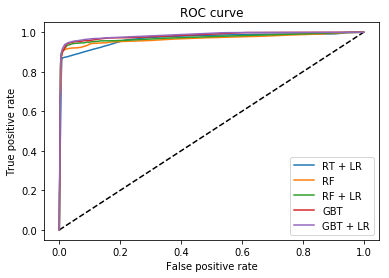

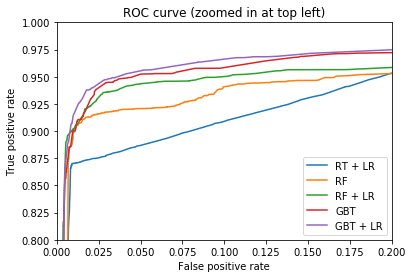

In [52]:
import numpy as np
np.random.seed(10)

import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (RandomTreesEmbedding, RandomForestClassifier,
                              GradientBoostingClassifier)
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.pipeline import make_pipeline

n_estimator = 10
X, y = make_classification(n_samples=80000)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

# It is important to train the ensemble of trees on a different subset
# of the training data than the linear regression model to avoid
# overfitting, in particular if the total number of leaves is
# similar to the number of training samples
X_train, X_train_lr, y_train, y_train_lr = train_test_split(
    X_train, y_train, test_size=0.5)

# Unsupervised transformation based on totally random trees
rt = RandomTreesEmbedding(max_depth=3, n_estimators=n_estimator,
                          random_state=0)

rt_lm = LogisticRegression(solver='lbfgs', max_iter=1000)
pipeline = make_pipeline(rt, rt_lm)
pipeline.fit(X_train, y_train)
y_pred_rt = pipeline.predict_proba(X_test)[:, 1]
fpr_rt_lm, tpr_rt_lm, _ = roc_curve(y_test, y_pred_rt)

# Supervised transformation based on random forests
rf = RandomForestClassifier(max_depth=3, n_estimators=n_estimator)
rf_enc = OneHotEncoder(categories='auto')
rf_lm = LogisticRegression(solver='lbfgs', max_iter=1000)
rf.fit(X_train, y_train)
rf_enc.fit(rf.apply(X_train))
rf_lm.fit(rf_enc.transform(rf.apply(X_train_lr)), y_train_lr)

y_pred_rf_lm = rf_lm.predict_proba(rf_enc.transform(rf.apply(X_test)))[:, 1]
fpr_rf_lm, tpr_rf_lm, _ = roc_curve(y_test, y_pred_rf_lm)

# Supervised transformation based on gradient boosted trees
grd = GradientBoostingClassifier(n_estimators=n_estimator)
grd_enc = OneHotEncoder(categories='auto')
grd_lm = LogisticRegression(solver='lbfgs', max_iter=1000)
grd.fit(X_train, y_train)
grd_enc.fit(grd.apply(X_train)[:, :, 0])
grd_lm.fit(grd_enc.transform(grd.apply(X_train_lr)[:, :, 0]), y_train_lr)

y_pred_grd_lm = grd_lm.predict_proba(
    grd_enc.transform(grd.apply(X_test)[:, :, 0]))[:, 1]
fpr_grd_lm, tpr_grd_lm, _ = roc_curve(y_test, y_pred_grd_lm)

# The gradient boosted model by itself
y_pred_grd = grd.predict_proba(X_test)[:, 1]
fpr_grd, tpr_grd, _ = roc_curve(y_test, y_pred_grd)

# The random forest model by itself
y_pred_rf = rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rt_lm, tpr_rt_lm, label='RT + LR')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.plot(fpr_rf_lm, tpr_rf_lm, label='RF + LR')
plt.plot(fpr_grd, tpr_grd, label='GBT')
plt.plot(fpr_grd_lm, tpr_grd_lm, label='GBT + LR')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rt_lm, tpr_rt_lm, label='RT + LR')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.plot(fpr_rf_lm, tpr_rf_lm, label='RF + LR')
plt.plot(fpr_grd, tpr_grd, label='GBT')
plt.plot(fpr_grd_lm, tpr_grd_lm, label='GBT + LR')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()

**11. Reframe Numerical Quantities**

Your data is very likely to contain quantities, which can be reframed to better expose relevant structures. This may be a transform into a new unit or the decomposition of a rate into time and amount components.

You may have a quantity like a weight, distance or timing. A linear transform may be useful to regression and other scale dependent methods.

For example, you may have Item_Weight in grams, with a value like 6289. You could create a new feature with this quantity in kilograms as 6.289 or rounded kilograms like 6. If the domain is shipping data, perhaps kilograms is sufficient or more useful (less noisy) a precision for Item_Weight.

The Item_Weight could be split into two features: Item_Weight_Kilograms and Item_Weight_Remainder_Grams, with example values of 6 and 289 respectively.

There may be domain knowledge that items with a weight above 4 incur a higher taxation rate. That magic domain number could be used to create a new binary feature Item_Above_4kg with a value of “1” for our example of 6289 grams.

You may also have a quantity stored as a rate or an aggregate quantity for an interval. For example, Num_Customer_Purchases aggregated over a year.

In this case you may want to go back to the data collection step and create new features in addition to this aggregate and try to expose more temporal structure in the purchases, like perhaps seasonality. For example, the following new binary features could be created: Purchases_Summer, Purchases_Fall, Purchases_Winter and Purchases_Spring.